In [228]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [229]:
# Importing necessary libraries
import numpy as np  # For numerical operations and linear algebra
import pandas as pd  # For data manipulation and processing, especially working with CSV files
import matplotlib.pyplot as plt  # For creating visualizations like plots and graphs
import seaborn as sns  # For more advanced data visualization, especially heatmaps and statistical plots
import matplotlib.image as mpimg  # To display and manipulate images
# Ensures that plots are shown inline in Jupyter Notebooks
%matplotlib inline  

# Importing performance metrics
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating regression models using MSE and R²

# Importing linear regression model from sklearn
from sklearn.linear_model import LinearRegression  # This will help us build a linear regression model

# Importing data splitting function
from sklearn.model_selection import train_test_split  # Used to split the dataset into training and testing sets

# Importing cross-validation function
from sklearn.model_selection import cross_val_score  # Used for cross-validation to get more reliable model performance estimates

# Importing decision tree regressor (another regression model)
from sklearn.tree import DecisionTreeRegressor  # A regression model based on decision trees

# Importing preprocessing tools
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  # StandardScaler for feature scaling, PolynomialFeatures for generating polynomial terms

# Importing regularized linear models
from sklearn.linear_model import Ridge, Lasso  # Ridge and Lasso are regularized regression models to prevent overfitting
from sklearn.ensemble import RandomForestRegressor

# Importing math module to calculate square roots
from math import sqrt  # sqrt function is used to compute the square root, often used in calculating RMSE (Root Mean Squared Error)


In [230]:
#read the data file
df=pd.read_csv('../input/california-housing-prices/housing.csv')

In [231]:
df.shape #get number of rows and column from data

(20640, 10)

In [232]:
df.head() #get the look of first dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [233]:
# see all the data column
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [234]:
df.sample(10) #see random data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2256,-119.84,36.80,16.0,2849.0,506.0,1508.0,478.0,3.4074,72700.0,INLAND
5563,-118.29,33.90,42.0,1273.0,309.0,1203.0,348.0,4.4636,162000.0,<1H OCEAN
10261,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,288500.0,<1H OCEAN
9838,-121.91,36.61,30.0,2755.0,597.0,1519.0,554.0,3.2952,234600.0,NEAR OCEAN
3316,-122.69,38.94,9.0,1245.0,234.0,517.0,187.0,3.1250,93400.0,INLAND
5130,-118.27,33.98,39.0,2062.0,588.0,1933.0,570.0,1.3801,97000.0,<1H OCEAN
18565,-121.74,36.92,17.0,2648.0,589.0,1193.0,540.0,2.4461,151700.0,<1H OCEAN
7066,-118.03,33.94,34.0,1748.0,386.0,917.0,378.0,3.4792,169000.0,<1H OCEAN
12570,-121.44,38.54,39.0,2855.0,NaN,1217.0,562.0,3.2404,93600.0,INLAND
15168,-117.06,33.02,24.0,830.0,190.0,279.0,196.0,1.9176,121100.0,<1H OCEAN


In [235]:
# see info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [236]:
#get total null value, first it gets true or false
#then sum calc col wise and then that total sum is calc
df.isnull().sum().sum()

207

In [237]:
# to get total no of null in each col
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [238]:
# used to generate descriptive statistics of a DataFrame or a specific set of columns.
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [239]:
#get the median for the null bedrooms
bedroom_median = df['total_bedrooms'].median()
bedroom_median

435.0

In [240]:
#fill the null values with bedroom_median
df['total_bedrooms'].fillna(bedroom_median, inplace=True)

/tmp/ipykernel_36/1359477041.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(bedroom_median, inplace=True)


In [241]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(bedroom_median)

In [242]:
#since we have filled the null value, stats will change
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [243]:
#check for duplicates
df.duplicated().sum()

0

In [244]:
# Remove duplicate rows , if above value was >0
df.drop_duplicates(inplace=True)

In [245]:
# plot_outliers: To visualize potential outliers in your data using box plots or other visualization techniques.
def plot_outliners(df, col):
    plt.title(col)
    ax=sns.boxplot(data=df, x=col)
    ax.set(xlabel='')
    plt.show()

# plot_hist: To visualize the distribution of a variable using histograms, which helps identify outliers and assess the overall shape of the data.
def plot_hist(df, col):
    plt.hist(x=df[col], bins=40, color='#008000')
    plt.show()

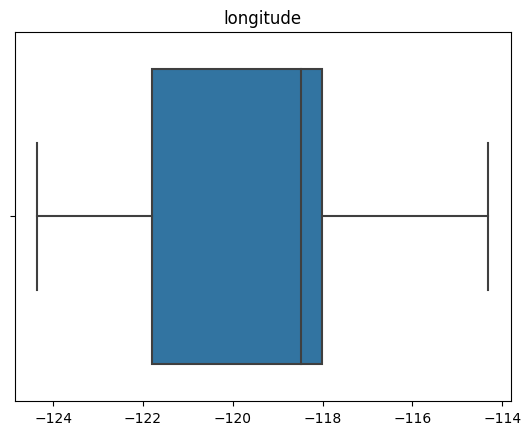

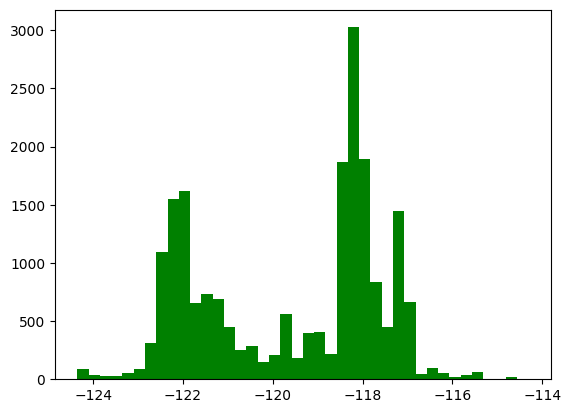

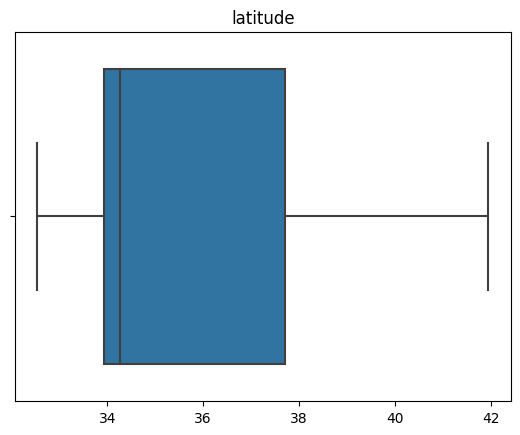

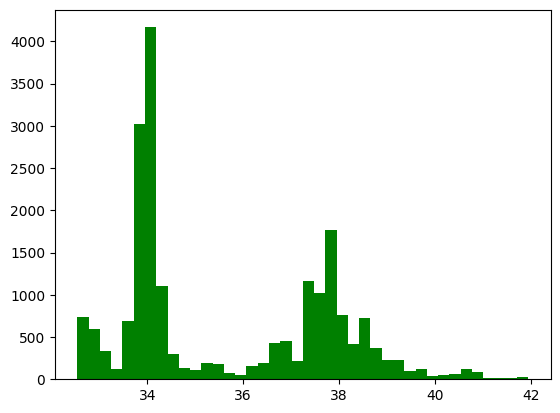

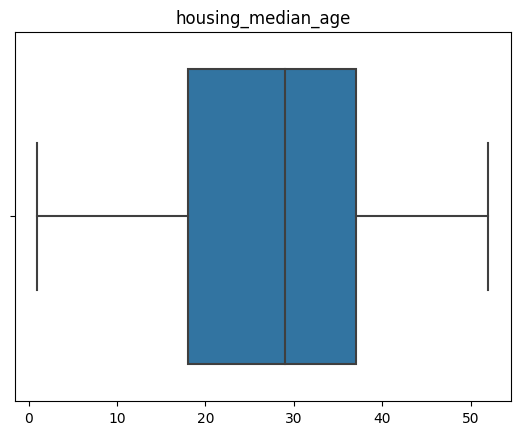

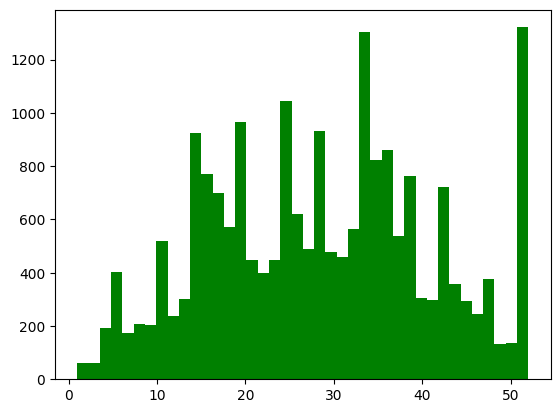

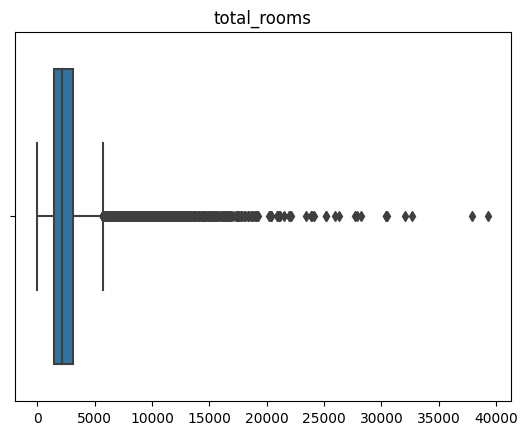

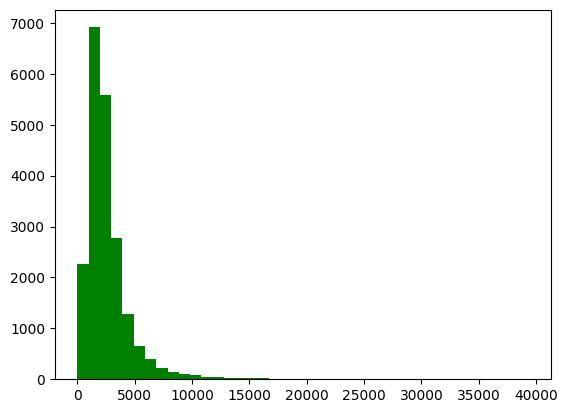

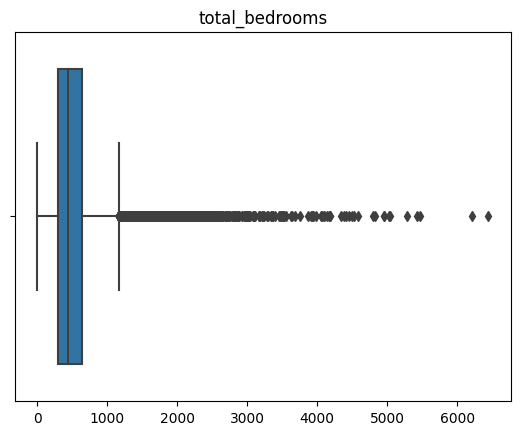

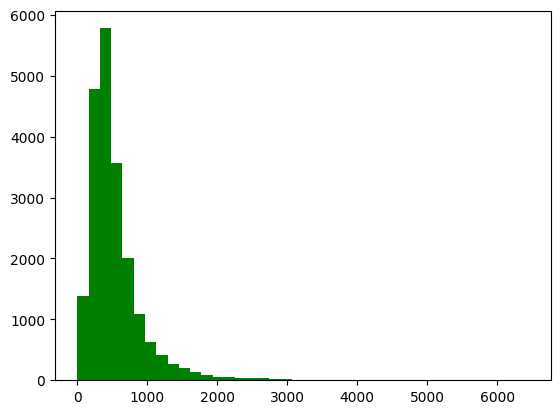

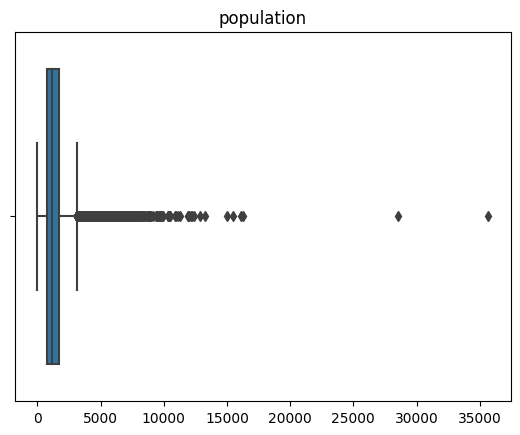

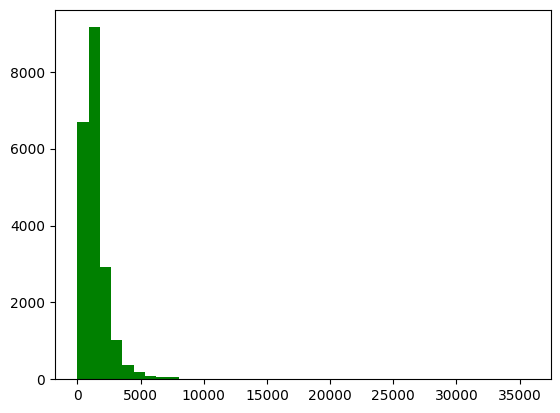

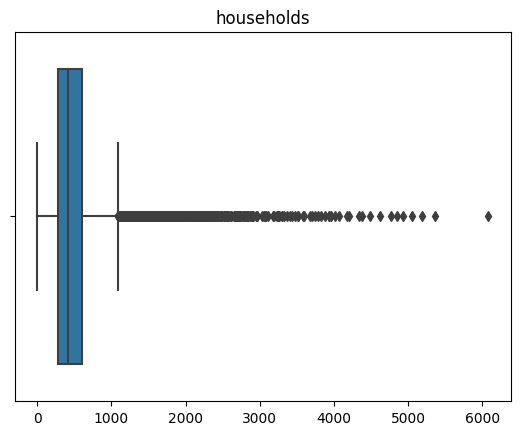

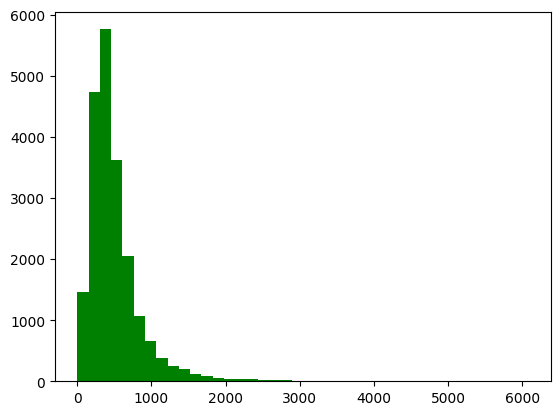

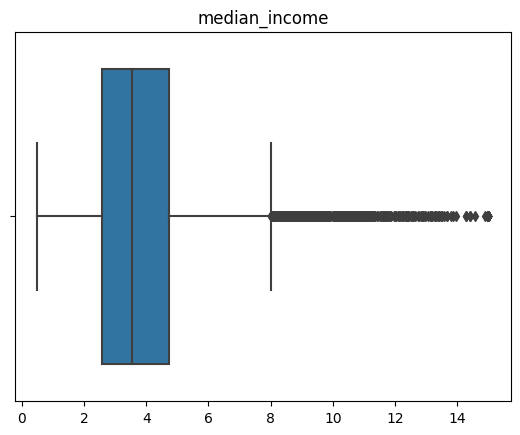

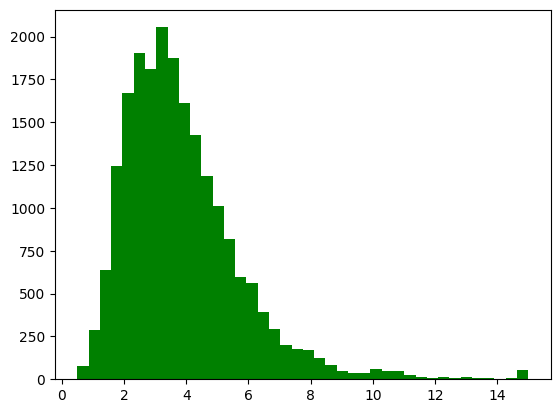

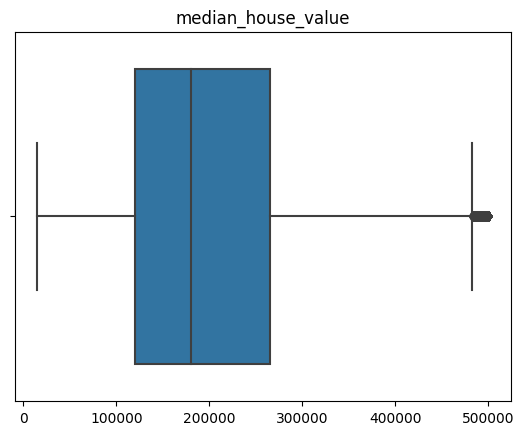

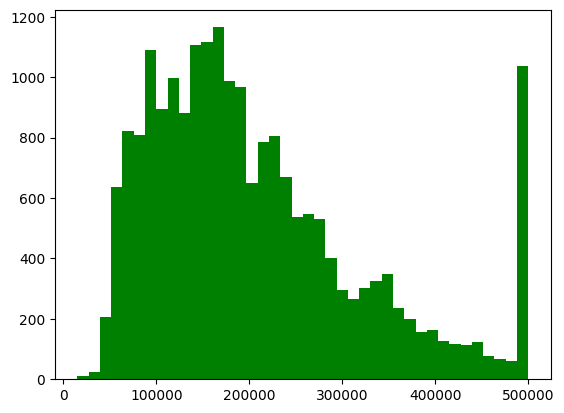

In [246]:
#loop on col to draw outliners
for col in df.columns:
    if df[col].dtype == 'float64':
        plot_outliners(df, col)
        plot_hist(df, col)

In [247]:
# Define the columns to check for outliers
cols = ['total_bedrooms', 'population', 'households', 'total_rooms']

# Initialize a list to store results
results = []

# Loop through each column
for col in cols:
    # Calculate the first and third quartiles for the current column
    firstQ = df[col].quantile(0.25)
    thirdQ = df[col].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    iqr = thirdQ - firstQ
    
    # Define the new upper bound for detecting outliers (anything greater than this will be considered an outlier)
    newB = thirdQ + 3 * iqr
    
    # Drop the rows where the value in the current column exceeds the upper bound (outliers)
    df.drop(df[df[col] > newB].index, axis=0, inplace=True)
    
    # Get the shape of the DataFrame after dropping outliers
    shape_after = df.shape
    
    # Store the column name, calculated IQR, and the shape of the DataFrame after removing outliers in the results list
    results.append({
        'column': col,    # The name of the column being processed
        'IQR': iqr,       # The calculated IQR for the current column
        'newB': newB,
        'shape_after': shape_after  # The shape of the DataFrame after removing outliers
    })

# Optionally, convert the list of results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


           column      IQR    newB  shape_after
0  total_bedrooms   346.25  1682.0  (20184, 10)
1      population   898.00  4371.0  (20025, 10)
2      households   305.00  1496.0  (19986, 10)
3     total_rooms  1586.00  7773.0  (19855, 10)


In [248]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19855.000000,19855.000000,19855.000000,19855.000000,19855.000000,19855.000000,19855.000000,19855.000000,19855.000000
mean,-119.591407,35.650936,29.153312,2342.482397,480.643264,1279.459280,449.132511,3.849380,206120.444271
std,2.003036,2.141464,12.422856,1343.135693,272.202236,727.702493,252.001974,1.895958,115652.421223
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.940000,19.000000,1425.000000,292.000000,774.000000,275.000000,2.551000,118500.000000
50%,-118.510000,34.270000,29.000000,2073.000000,426.000000,1139.000000,399.000000,3.517900,178600.000000
75%,-118.020000,37.720000,37.000000,2991.000000,612.000000,1643.000000,575.000000,4.714300,263900.000000
max,-114.310000,41.950000,52.000000,7754.000000,1646.000000,4367.000000,1496.000000,15.000100,500001.000000


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19855 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19855 non-null  float64
 1   latitude            19855 non-null  float64
 2   housing_median_age  19855 non-null  float64
 3   total_rooms         19855 non-null  float64
 4   total_bedrooms      19855 non-null  float64
 5   population          19855 non-null  float64
 6   households          19855 non-null  float64
 7   median_income       19855 non-null  float64
 8   median_house_value  19855 non-null  float64
 9   ocean_proximity     19855 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [250]:
#show corellation b/w columns
df.corr() 

ValueError: could not convert string to float: 'NEAR BAY'

In [252]:
# Select only numeric columns from the DataFrame
num_df = df.select_dtypes(include=[np.number])

In [253]:
num_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924605,-0.098044,0.003978,0.041384,0.106120,0.032183,-0.016650,-0.045491
latitude,-0.924605,1.000000,0.000629,-0.006527,-0.050530,-0.127223,-0.062754,-0.079678,-0.145278
housing_median_age,-0.098044,0.000629,1.000000,-0.333454,-0.269588,-0.246823,-0.247483,-0.107382,0.114106
total_rooms,0.003978,-0.006527,-0.333454,1.000000,0.884602,0.786026,0.883381,0.227568,0.174922
total_bedrooms,0.041384,-0.050530,-0.269588,0.884602,1.000000,0.831967,0.967096,-0.063024,0.050382
population,0.106120,-0.127223,-0.246823,0.786026,0.831967,1.000000,0.875628,-0.048221,-0.055903
households,0.032183,-0.062754,-0.247483,0.883381,0.967096,0.875628,1.000000,-0.032113,0.070484
median_income,-0.016650,-0.079678,-0.107382,0.227568,-0.063024,-0.048221,-0.032113,1.000000,0.687141
median_house_value,-0.045491,-0.145278,0.114106,0.174922,0.050382,-0.055903,0.070484,0.687141,1.000000


In [254]:
num_df.corr()['median_house_value'].sort_values(ascending=True)

latitude             -0.145278
population           -0.055903
longitude            -0.045491
total_bedrooms        0.050382
households            0.070484
housing_median_age    0.114106
total_rooms           0.174922
median_income         0.687141
median_house_value    1.000000
Name: median_house_value, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

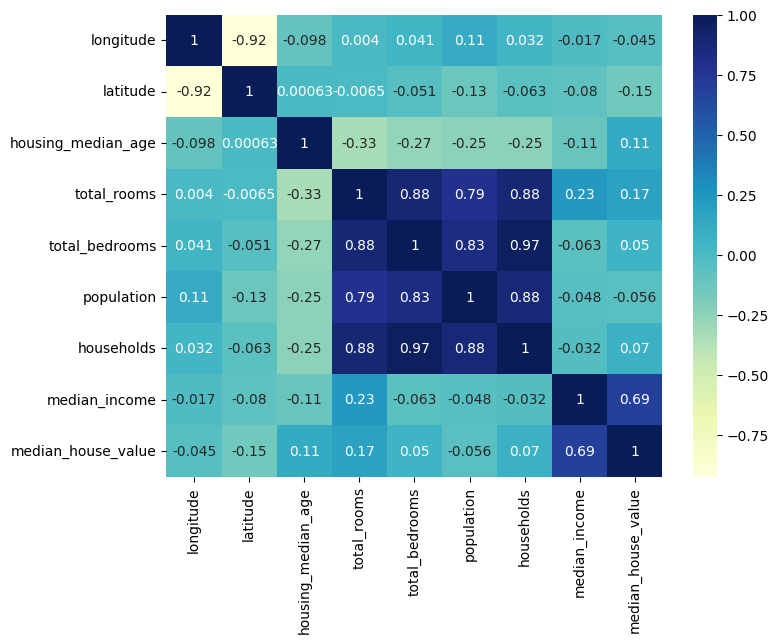

In [255]:
#visualize the correlation with heatmap
plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), cmap='YlGnBu', annot=True)
plt.show

In [256]:
# create a function to show the values in the plot
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

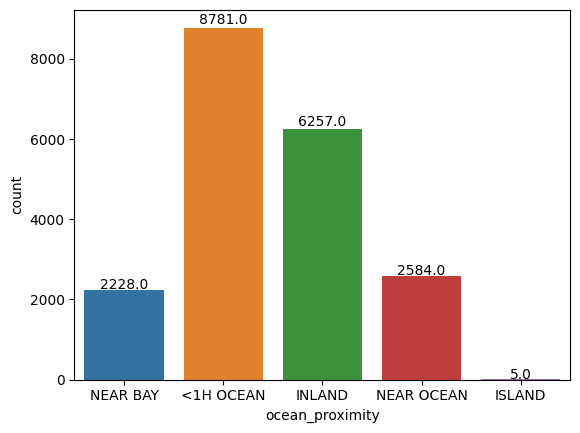

In [257]:
x1=sns.countplot(x=df['ocean_proximity'], data=df)
show_values(x1) #show count on the bar

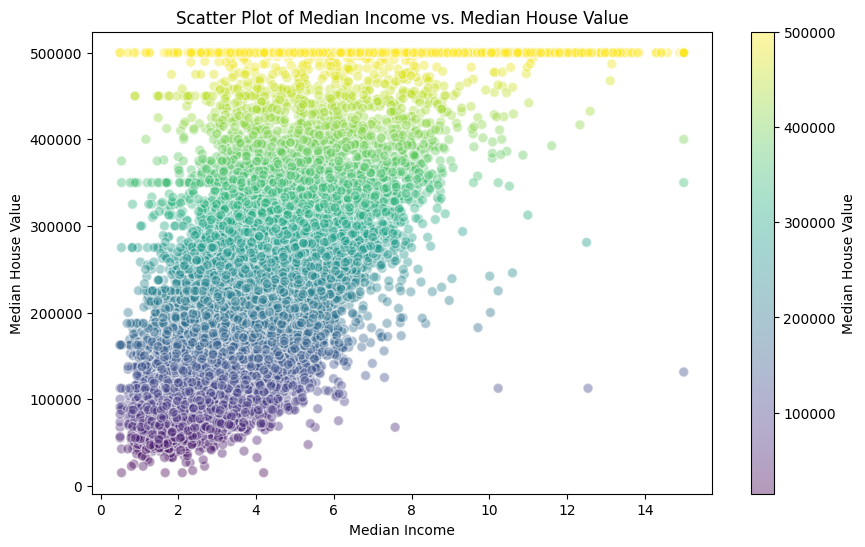

In [258]:
# Extract data from DataFrame
x = df['median_income']
y = df['median_house_value']
c = df['median_house_value']  # Use this for color coding
alpha = 0.4  # Transparency level

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=c, cmap='viridis', alpha=alpha, edgecolor='w', s=50)
plt.colorbar(scatter, label='Median House Value')  # Add color bar to show color scale

# Add labels and title
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Scatter Plot of Median Income vs. Median House Value')

# Show the plot
plt.show()

In [259]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [260]:
df = pd.get_dummies(df, prefix=None) # this do OHE on ocean col do T&F
df = df.astype(int) #convert T&F to 0&1
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122,37,41,880,129,322,126,8,452600,0,0,0,1,0
1,-122,37,21,7099,1106,2401,1138,8,358500,0,0,0,1,0
2,-122,37,52,1467,190,496,177,7,352100,0,0,0,1,0
3,-122,37,52,1274,235,558,219,5,341300,0,0,0,1,0
4,-122,37,52,1627,280,565,259,3,342200,0,0,0,1,0


In [261]:
#define dataset
X=df.drop(columns=['median_house_value', 'longitude', 'latitude', 'ocean_proximity_ISLAND']).astype(float)
y=df.loc[:,'median_house_value'].astype(float)

In [262]:
X

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.0,0.0,0.0,1.0,0.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.0,0.0,0.0,1.0,0.0
2,52.0,1467.0,190.0,496.0,177.0,7.0,0.0,0.0,1.0,0.0
3,52.0,1274.0,235.0,558.0,219.0,5.0,0.0,0.0,1.0,0.0
4,52.0,1627.0,280.0,565.0,259.0,3.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.0,0.0,1.0,0.0,0.0
20636,18.0,697.0,150.0,356.0,114.0,2.0,0.0,1.0,0.0,0.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.0,0.0,1.0,0.0,0.0
20638,18.0,1860.0,409.0,741.0,349.0,1.0,0.0,1.0,0.0,0.0


In [263]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 19855, dtype: float64

In [264]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.20, random_state=40)

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=40)

In [266]:
#Actual train,test and val
y_actual_train=y_train
y_actual_test=y_test
y_actual_val=y_val


In [267]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

In [268]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [269]:
print(f'The Linear regression coefficients are: {model.coef_}')
print(f'The Linear regression interception is: {model.intercept_}')

The Linear regression coefficients are: [ 1.14125294e+03 -5.40126373e+00  7.76757916e+01 -6.31480495e+01
  1.48284896e+02  3.82622141e+04 -1.70423843e+05 -2.41671174e+05
 -1.68797002e+05 -1.60759635e+05]
The Linear regression interception is: 224891.2264219323


In [270]:
#predict the value
y_predict=model.predict(X_test)
y_predict

array([233469.3478347 , 274269.69639304, 168355.35160463, ...,
       265276.99181753, 165194.08396065, 127098.87424149])

In [271]:
#real value
y_test

6286     178100.0
17575    211300.0
9775     125500.0
16765    275600.0
8275     163300.0
           ...   
19070    248300.0
18358    500001.0
8279     207800.0
13010    162700.0
11200    175000.0
Name: median_house_value, Length: 3971, dtype: float64

In [272]:
# Regression Score
train_data_score = model.score(X_train , y_train)
test_data_score = model.score(X_test , y_test)
val_data_score = model.score(X_val , y_val)

print(f'The Linear regression train R^2 is: {train_data_score}')
print(f'The Linear regression val R^2 is: {val_data_score}')
print(f'The Linear regression test R^2 is: {test_data_score}')

The Linear regression train R^2 is: 0.6357176201989776
The Linear regression val R^2 is: 0.6284586445692357
The Linear regression test R^2 is: 0.6284586445692357


In [273]:
y_pred_lr = model.predict(X_test)
r2_score(y_test, y_pred_lr)

0.6284586445692357

In [274]:
# Evaluate
import math
MSE = np.square(np.subtract(y_actual_test,y_pred_lr)).mean() 
RMSE = math.sqrt(MSE)
print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 4868596675.717437
Root Mean Square Error: 69775.3299936119


In [275]:
y_train.shape, y_pred_lr.shape

((15884,), (3971,))

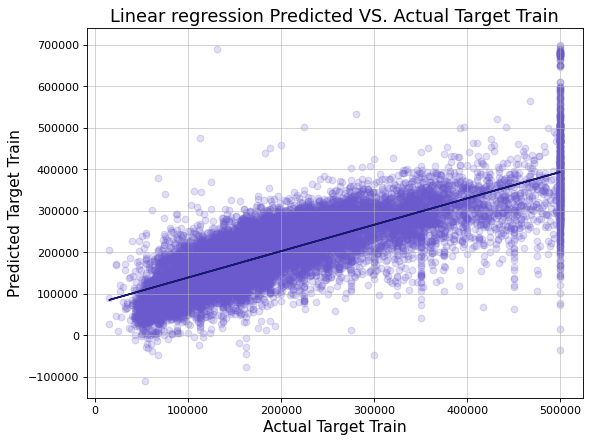

In [276]:
y_train_pred_linear = model.predict(X_train)
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred_linear, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred_linear, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train', fontsize=14)
plt.ylabel('Predicted Target Train', fontsize=14)
plt.title('Linear regression Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)

Decision Tree Regression Model
Linearmodel was not performing well, trying different model

In [277]:
DT_model=DecisionTreeRegressor(max_depth=4)
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [278]:
# Predict Value
y_predict_dt = DT_model.predict(X_test)
y_predict_dt

array([224790.06425041, 302252.53183521, 224790.06425041, ...,
       224790.06425041, 202402.58452722, 146696.65222102])

In [279]:
#real Value
y_test

6286     178100.0
17575    211300.0
9775     125500.0
16765    275600.0
8275     163300.0
           ...   
19070    248300.0
18358    500001.0
8279     207800.0
13010    162700.0
11200    175000.0
Name: median_house_value, Length: 3971, dtype: float64

In [280]:
## Score
train_data_score_dt = DT_model.score(X_train , y_train)
test_data_score_dt = DT_model.score(X_test , y_test)
val_data_score_dt = DT_model.score(X_val , y_val)

print(f'The Decision tree regressor train R^2 is: {train_data_score_dt}')
print(f'The Decision tree regressor val R^2 is: {val_data_score_dt}')
print(f'The Decision tree regressor test R^2 is: {test_data_score_dt}')

The Decision tree regressor train R^2 is: 0.5981101352371847
The Decision tree regressor val R^2 is: 0.5926656934059612
The Decision tree regressor test R^2 is: 0.5926656934059612


Lasso Regression

In [281]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.676e+13, tolerance: 2.135e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [282]:
# Predict Value
y_predict_lasso = lasso_model.predict(X_test)
y_predict_lasso

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


array([-3.57649804e+07, -1.76770475e+07, -5.83155704e+07, ...,
       -4.58985662e+07, -1.39321352e+08, -2.18078868e+07])

In [283]:
## Score
train_data_score_ls = lasso_model.score(X_train_scaled , y_train)
test_data_score_ls = lasso_model.score(X_test_scaled , y_test)
val_data_score_ls = lasso_model.score(X_val_scaled , y_test)

print(f'The Ridge regression train R^2 is: {train_data_score_ls}')
print(f'The Ridge regression val R^2 is: {val_data_score_ls}')
print(f'The Ridge regression test R^2 is: {test_data_score_ls}')

The Ridge regression train R^2 is: 0.6355682107755054
The Ridge regression val R^2 is: 0.6284632307381093
The Ridge regression test R^2 is: 0.6284632307381093


In [284]:
# Evaluate
import math
MSE = np.square(np.subtract(y_actual_test,y_predict_lasso)).mean() 
RMSE = math.sqrt(MSE)

print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 3118660935309508.5
Root Mean Square Error: 55844972.33690342


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


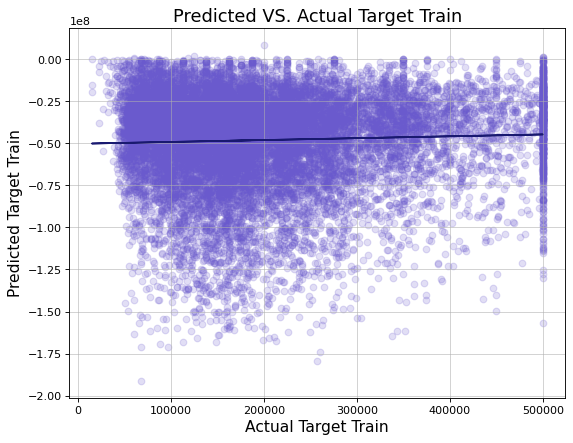

In [285]:
y_train_pred_lasso = lasso_model.predict(X_train)
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred_lasso, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred_lasso, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train', fontsize=14)
plt.ylabel('Predicted Target Train', fontsize=14)
plt.title('Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)

Ridge

In [286]:
rl = Ridge(alpha=1)
rl.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [287]:
#Score
rl_train = rl.score(X_train_scaled, y_train)
rl_test = rl.score(X_test_scaled, y_test)
rl_val=rl.score(X_val_scaled, y_val)

print(f'The Ridge regression train R^2 is: {rl_train}')
print(f'The Ridge regression val R^2 is: {rl_val}')
print(f'The Ridge regression test R^2 is: {rl_test}')

The Ridge regression train R^2 is: 0.635705453299164
The Ridge regression val R^2 is: 0.6284565032798314
The Ridge regression test R^2 is: 0.6284565032798314


In [288]:
# Predict Value
y_predict_ri = rl.predict(X_test)
y_predict_ri

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


array([-3.57796257e+07, -1.77043948e+07, -5.83203837e+07, ...,
       -4.59108971e+07, -1.39322310e+08, -2.18333170e+07])

In [289]:
# Evaluate
import math
MSE = np.square(np.subtract(y_actual_test,y_predict_ri)).mean() 
RMSE = math.sqrt(MSE)

print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 3119718753769366.0
Root Mean Square Error: 55854442.56072534


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


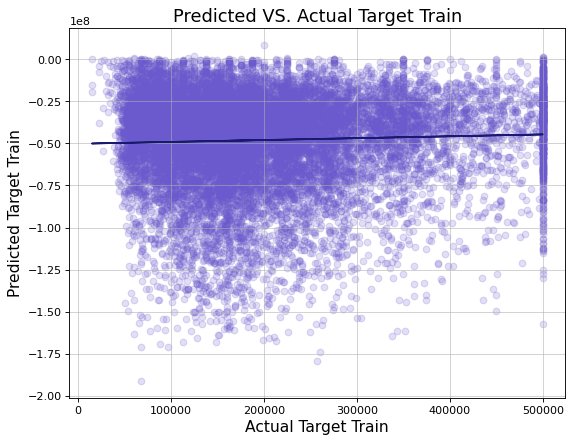

In [290]:
y_train_pred_rl = rl.predict(X_train)
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred_rl, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred_rl, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train', fontsize=14)
plt.ylabel('Predicted Target Train', fontsize=14)
plt.title('Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)

Random forest regressor model

In [291]:
forest=RandomForestRegressor(n_estimators=5)
forest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5)

In [292]:
y_pr_f=forest.predict(X_test)
y_pr_f

array([176400., 268620., 185020., ..., 197540., 194740., 219060.])

In [293]:
#real Value
y_test

6286     178100.0
17575    211300.0
9775     125500.0
16765    275600.0
8275     163300.0
           ...   
19070    248300.0
18358    500001.0
8279     207800.0
13010    162700.0
11200    175000.0
Name: median_house_value, Length: 3971, dtype: float64

In [294]:
train_data_score_forest = forest.score(X_train , y_train)
test_data_score_forest = forest.score(X_test , y_test)
test_data_score_forest = forest.score(X_val , y_val)

print(f'The Random Forest Regressor train R^2 is: {train_data_score_forest}')
print(f'The Random Forest Regressor test R^2 is: {test_data_score_forest}')
print(f'The Random Forest Regressor R^2 is: {test_data_score_forest}')

The Random Forest Regressor train R^2 is: 0.9256990665635972
The Random Forest Regressor test R^2 is: 0.6407209917663785
The Random Forest Regressor R^2 is: 0.6407209917663785


In [295]:
# Evaluate
import math
MSE = np.square(np.subtract(y_actual_test,y_pr_f)).mean() 
RMSE = math.sqrt(MSE)

print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 4707913559.483213
Root Mean Square Error: 68614.23729433428


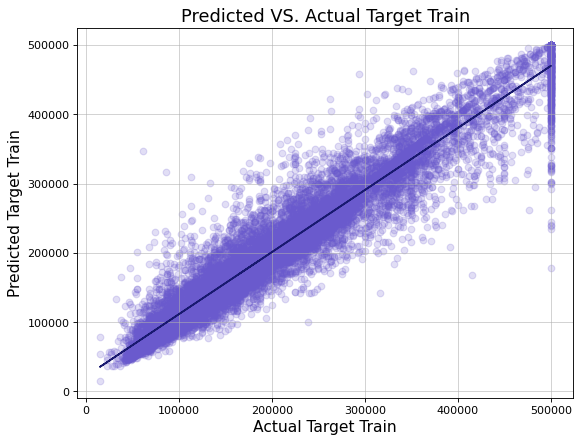

In [296]:
y_train_pred_forest = forest.predict(X_train)
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred_forest, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred_forest, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train', fontsize=14)
plt.ylabel('Predicted Target Train', fontsize=14)
plt.title('Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)

Polynomial Model

In [297]:
poly = PolynomialFeatures(degree=3) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

poly_model = LinearRegression()

In [298]:
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [299]:
X_poly = poly.fit_transform(X_test)
regressor = LinearRegression()
regressor.fit(X_poly,y_test)
y_poly_pred=regressor.predict(X_poly)

In [300]:
#Score
poly_val=poly_model.score(X_val_poly, y_val)
poly_test=poly_model.score(X_test_poly, y_test)
poly_train=poly_model.score(X_train_poly, y_train)

print(f'The polynomial regression train R^2 is: {poly_train}')
print(f'polynomial regression test R^2 is: {poly_test}')
print(f'polynomial regression val R^2 is: {poly_val}')

The polynomial regression train R^2 is: 0.7245930815794988
polynomial regression test R^2 is: 0.7005258021949703
polynomial regression val R^2 is: 0.7005258021949703


In [301]:
# Evaluate
import math
MSE = np.square(np.subtract(y_actual_test,y_poly_pred)).mean() 
RMSE = math.sqrt(MSE)

print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 3596066586.177078
Root Mean Square Error: 59967.21259302518


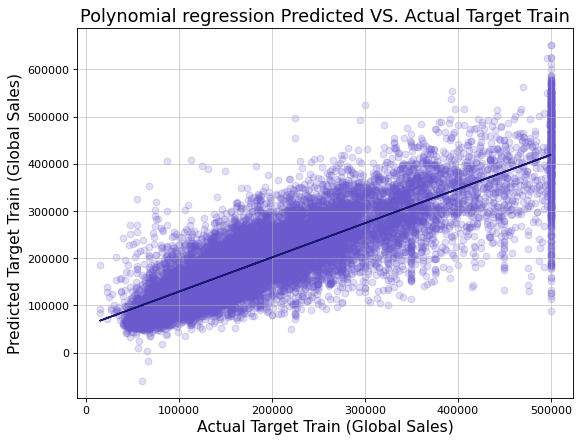

In [302]:
y_train_pred_poly = poly_model.predict(X_train_poly)
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred_poly, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred_poly, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train (Global Sales)', fontsize=14)
plt.ylabel('Predicted Target Train (Global Sales)', fontsize=14)
plt.title('Polynomial regression Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)